In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)
import xgboost as xgb
import lightgbm as lgb

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [20]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (918, 12)


In [15]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [16]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [17]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
               Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngi

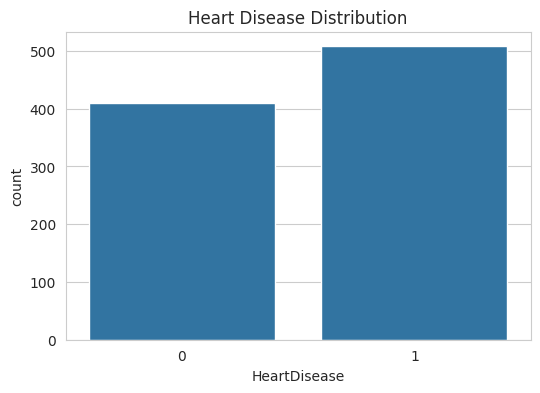

In [29]:
# 1. Target variable distribution
plt.figure(figsize=(6, 4)) # Increased figure size
plt.subplot(1, 1, 1) # Adjusted subplot for single plot
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show() # Added plt.show() to display plot immediately

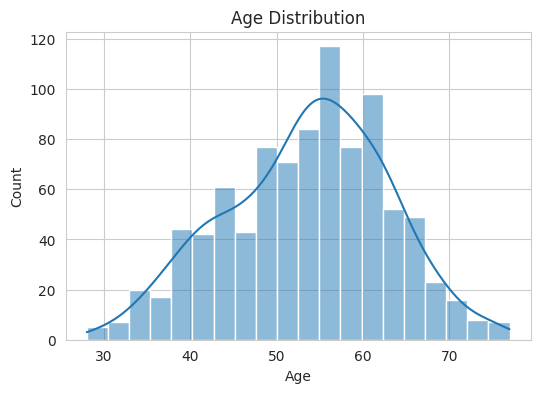

In [30]:
# 2. Age distribution
plt.figure(figsize=(6, 4)) # Increased figure size
plt.subplot(1, 1, 1) # Adjusted subplot for single plot
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show() # Added plt.show() to display plot immediately

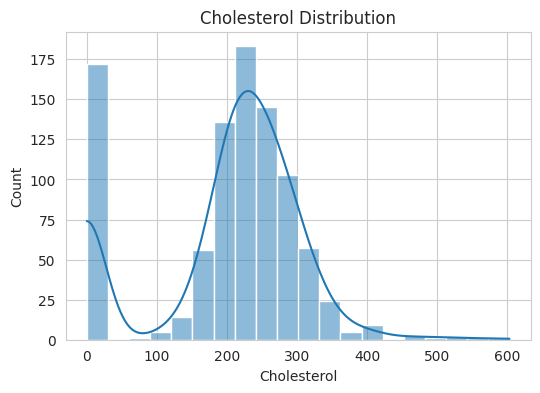

In [31]:
# 3. Cholesterol distribution
plt.figure(figsize=(6, 4)) # Increased figure size
plt.subplot(1, 1, 1) # Adjusted subplot for single plot
sns.histplot(df['Cholesterol'], bins=20, kde=True)
plt.title('Cholesterol Distribution')
plt.show() # Added plt.show() to display plot immediately

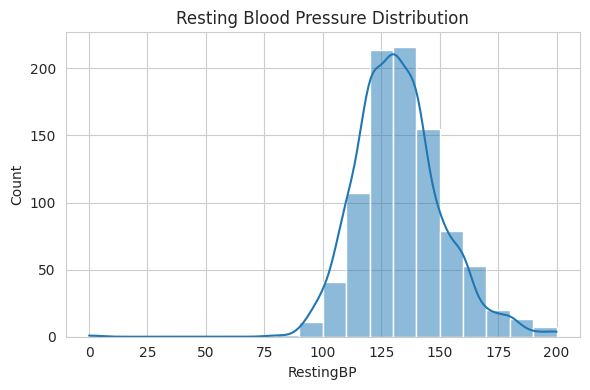

In [32]:
# 4. RestingBP distribution
plt.figure(figsize=(6, 4)) # Increased figure size
plt.subplot(1, 1, 1) # Adjusted subplot for single plot
sns.histplot(df['RestingBP'], bins=20, kde=True)
plt.title('Resting Blood Pressure Distribution')

plt.tight_layout()
plt.show()

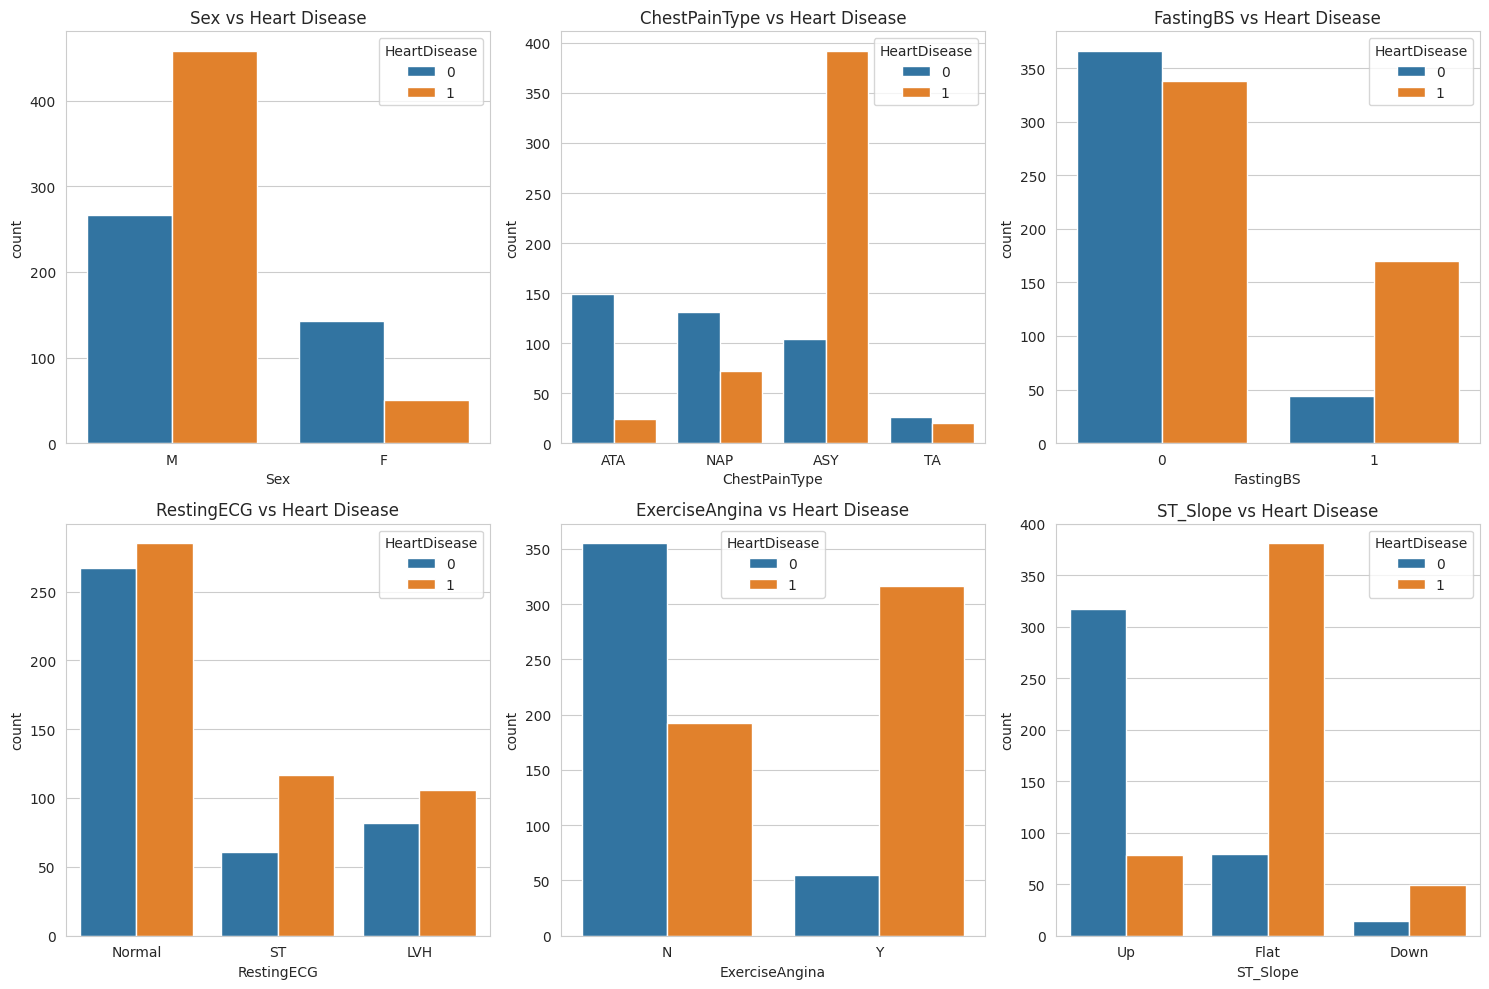

In [33]:
# Categorical features visualization
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()

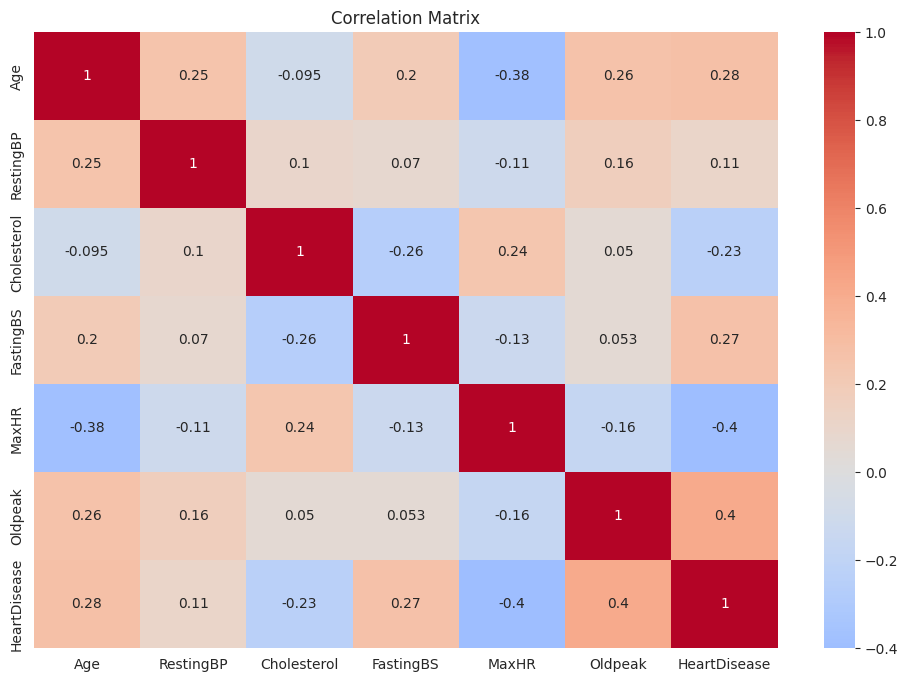

In [34]:
# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [36]:
# Check for duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")


Number of duplicates: 0


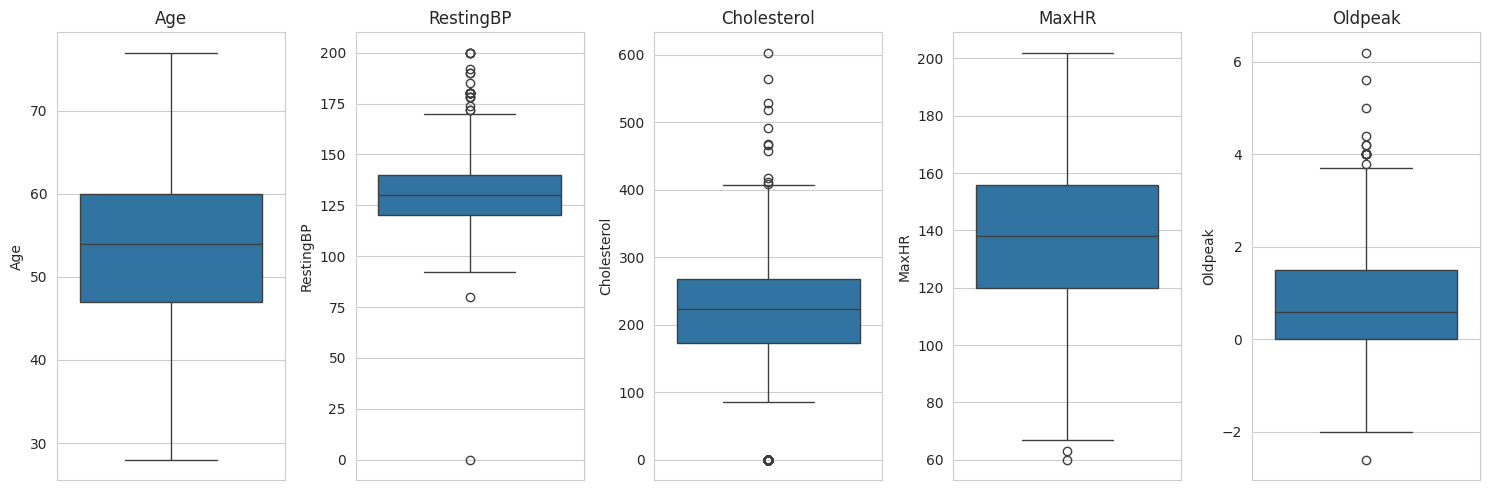

In [37]:
# Check for outliers
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [38]:
# Investigate zero values in key features
print("\nPatients with zero RestingBP:", len(df[df['RestingBP'] == 0]))
print("Patients with zero Cholesterol:", len(df[df['Cholesterol'] == 0]))


Patients with zero RestingBP: 1
Patients with zero Cholesterol: 172


In [39]:
# Handle outliers and invalid values
# Replace zero values in RestingBP with median (zeros are likely errors)
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].median())

In [40]:
# Cholesterol has many zeros - these might be valid (fasting) but we'll treat as missing
# Replace zero cholesterol with median of non-zero values
df['Cholesterol'] = df['Cholesterol'].replace(0, df[df['Cholesterol'] > 0]['Cholesterol'].median())

In [41]:
# Convert categorical features
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [42]:
# One-hot encoding for other categorical features
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

In [43]:
# Verify the cleaned data
print("\nAfter cleaning:")
print(df.head())
print(df.info())


After cleaning:
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0               True              False   
1      1.0             1              False               True   
2      0.0             0               True              False   
3      1.5             1              False              False   
4      0.0             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True          False          False   
1  

In [44]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 40, 50, 60, 70, 100],
                        labels=['<40', '40-50', '50-60', '60-70', '70+'])

In [45]:
# Create HR/BP ratio
df['HR_BP_Ratio'] = df['MaxHR'] / df['RestingBP']

In [46]:
# Create cholesterol to age ratio
df['Chol_Age_Ratio'] = df['Cholesterol'] / df['Age']

In [47]:
# Verify new features
print("\nFeature engineering:")
print(df[['AgeGroup', 'HR_BP_Ratio', 'Chol_Age_Ratio']].head())


Feature engineering:
  AgeGroup  HR_BP_Ratio  Chol_Age_Ratio
0      <40     1.228571        7.225000
1    40-50     0.975000        3.673469
2      <40     0.753846        7.648649
3    40-50     0.782609        4.458333
4    50-60     0.813333        3.611111


In [48]:
# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [49]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [51]:
# Handle class imbalance with SMOTE
# Drop AgeGroup column as it's not numeric and causes error with SMOTE
X_train_numeric = X_train.drop('AgeGroup', axis=1)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_numeric, y_train)

print("\nClass distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())


Class distribution before SMOTE:
HeartDisease
1    406
0    328
Name: count, dtype: int64

Class distribution after SMOTE:
HeartDisease
1    406
0    406
Name: count, dtype: int64


In [53]:
# Define numeric and categorical features for preprocessing
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
                    'HR_BP_Ratio', 'Chol_Age_Ratio']
categorical_features = ['Sex', 'FastingBS', 'ExerciseAngina',
                       'ChestPainType_ATA', 'ChestPainType_NAP',
                       'ChestPainType_TA', 'RestingECG_Normal',
                       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']

In [54]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

In [55]:
# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train_res)
X_test_preprocessed = preprocessor.transform(X_test)

In [56]:
# XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='auc'
)

In [57]:
# Train the model
xgb_model.fit(
    X_train_preprocessed,
    y_train_res,
    eval_set=[(X_test_preprocessed, y_test)],
    verbose=10
)

[0]	validation_0-auc:0.87673
[10]	validation_0-auc:0.91129
[20]	validation_0-auc:0.90638
[30]	validation_0-auc:0.90644
[40]	validation_0-auc:0.90513
[50]	validation_0-auc:0.90561
[52]	validation_0-auc:0.90609


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
# Make predictions
xgb_preds = xgb_model.predict(X_test_preprocessed)
xgb_probs = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

In [59]:
# Evaluate performance
print("\nXGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
print(f"Precision: {precision_score(y_test, xgb_preds):.4f}")
print(f"Recall: {recall_score(y_test, xgb_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, xgb_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_probs):.4f}")


XGBoost Performance:
Accuracy: 0.8587
Precision: 0.8958
Recall: 0.8431
F1 Score: 0.8687
ROC AUC: 0.9209


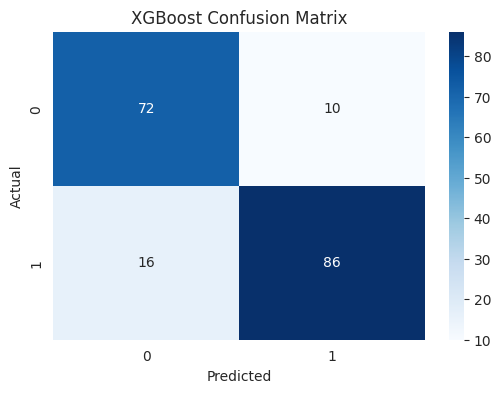

In [60]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

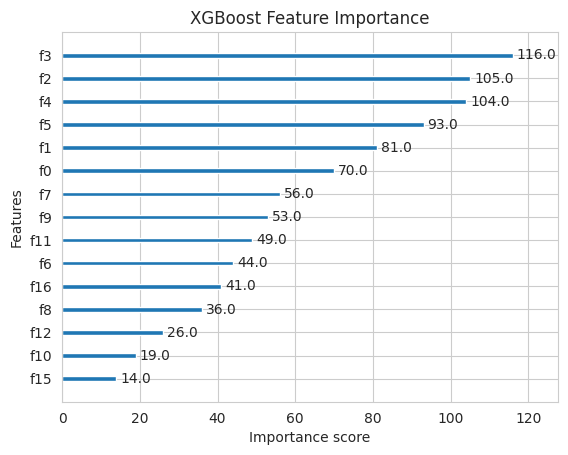

In [61]:
# Feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=15)
plt.title('XGBoost Feature Importance')
plt.show()

In [62]:
# LightGBM model
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    num_leaves=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    early_stopping_round=50,
    metric='auc'
)

In [64]:
# Train the model
lgb_model.fit(
    X_train_preprocessed,
    y_train_res,
    eval_set=[(X_test_preprocessed, y_test)],
    eval_metric='auc'
)

[LightGBM] [Info] Number of positive: 406, number of negative: 406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 812, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(colsample_bytree=0.8, early_stopping_round=50,
               learning_rate=0.01, max_depth=5, metric='auc', n_estimators=1000,
               num_leaves=20, objective='binary', random_state=42,
               reg_alpha=0.1, reg_lambda=0.1, subsample=0.8)

In [65]:
# Make predictions
lgb_preds = lgb_model.predict(X_test_preprocessed)
lgb_probs = lgb_model.predict_proba(X_test_preprocessed)[:, 1]

In [66]:
# Evaluate performance
print("\nLightGBM Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgb_preds):.4f}")
print(f"Precision: {precision_score(y_test, lgb_preds):.4f}")
print(f"Recall: {recall_score(y_test, lgb_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, lgb_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, lgb_probs):.4f}")


LightGBM Performance:
Accuracy: 0.8261
Precision: 0.8571
Recall: 0.8235
F1 Score: 0.8400
ROC AUC: 0.8940


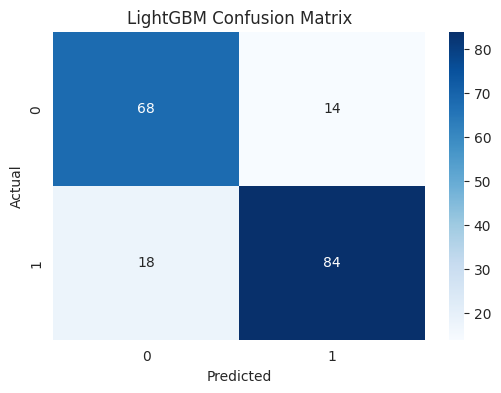

In [67]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lgb_preds), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

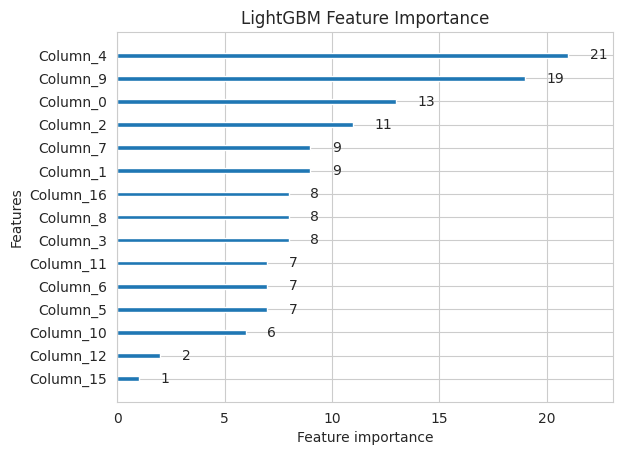

In [68]:
# Feature importance
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=15)
plt.title('LightGBM Feature Importance')
plt.show()

In [69]:
# Compare both models
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'XGBoost': [
        accuracy_score(y_test, xgb_preds),
        precision_score(y_test, xgb_preds),
        recall_score(y_test, xgb_preds),
        f1_score(y_test, xgb_preds),
        roc_auc_score(y_test, xgb_probs)
    ],
    'LightGBM': [
        accuracy_score(y_test, lgb_preds),
        precision_score(y_test, lgb_preds),
        recall_score(y_test, lgb_preds),
        f1_score(y_test, lgb_preds),
        roc_auc_score(y_test, lgb_probs)
    ]
})

print("\nModel Comparison:")
print(results)


Model Comparison:
      Metric   XGBoost  LightGBM
0   Accuracy  0.858696  0.826087
1  Precision  0.895833  0.857143
2     Recall  0.843137  0.823529
3   F1 Score  0.868687  0.840000
4    ROC AUC  0.920911  0.893950


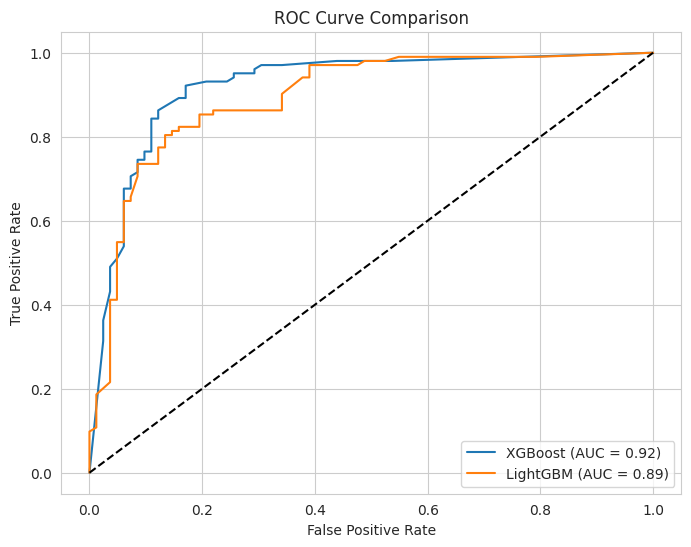

In [70]:
# Plot ROC curves
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_probs):.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_score(y_test, lgb_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [71]:
# Create a pipeline with preprocessing and model
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        learning_rate=0.01,
        max_depth=5,
        random_state=42
    ))
])

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        objective='binary',
        learning_rate=0.01,
        max_depth=5,
        random_state=42
    ))
])

In [72]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nCross-Validation Results:")
for name, model in [('XGBoost', xgb_pipeline), ('LightGBM', lgb_pipeline)]:
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"{name} - Mean AUC: {scores.mean():.4f} (±{scores.std():.4f})")


Cross-Validation Results:
XGBoost - Mean AUC: 0.9012 (±0.0287)
[LightGBM] [Info] Number of positive: 324, number of negative: 263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 587, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551959 -> initscore=0.208589
[LightGBM] [Info] Start training from score 0.208589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [73]:
# Train final model on all training data
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

In [74]:
# Fit on all training data (no SMOTE here to avoid data leakage)
final_model.fit(preprocessor.fit_transform(X_train), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
# Save the model and preprocessing
import joblib
joblib.dump(final_model, 'final_heart_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [77]:
# Example prediction function
def predict_heart_disease(input_data):
    """
    input_data: Dictionary with feature values
    Returns: Probability of heart disease
    """
    # Load model and preprocessor
    model = joblib.load('final_heart_model.pkl')
    preprocessor = joblib.load('preprocessor.pkl')

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply feature engineering steps from the notebook
    # Create age bins (need to be consistent with training)
    input_df['AgeGroup'] = pd.cut(input_df['Age'], bins=[0, 40, 50, 60, 70, 100],
                                    labels=['<40', '40-50', '50-60', '60-70', '70+'])

    # Create HR/BP ratio
    input_df['HR_BP_Ratio'] = input_df['MaxHR'] / input_df['RestingBP']

    # Create cholesterol to age ratio
    input_df['Chol_Age_Ratio'] = input_df['Cholesterol'] / input_df['Age']

    # Convert Sex and ExerciseAngina
    input_df['Sex'] = input_df['Sex'].map({'M': 1, 'F': 0})
    input_df['ExerciseAngina'] = input_df['ExerciseAngina'].map({'Y': 1, 'N': 0})

    # One-hot encode other categorical features
    input_df = pd.get_dummies(input_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)



    training_columns = X_train.columns.tolist()

    # Add missing columns to input_df with default value 0 or False (depending on the type)
    for col in training_columns:
        if col not in input_df.columns:
            # Determine appropriate default value based on expected type after one-hot encoding
            # For one-hot encoded columns, default is False
            # For numeric/binary encoded columns, default is 0
            if col.startswith(('ChestPainType_', 'RestingECG_', 'ST_Slope_')):
                 input_df[col] = False
            elif col == 'AgeGroup':
                pass

            else:
                input_df[col] = 0 # Default for numeric/binary

    # Ensure the columns are in the same order as the training data before dropping AgeGroup
    input_df = input_df[training_columns]

    # Drop AgeGroup from input_df as it was dropped from X_train_numeric before SMOTE and preprocessing
    input_df = input_df.drop('AgeGroup', axis=1)


    # Now apply preprocessing
    processed_data = preprocessor.transform(input_df)


    # Make prediction
    probability = model.predict_proba(processed_data)[0, 1]

    return probability

# Example usage
sample_input = {
    'Age': 55,
    'Sex': 'M',
    'ChestPainType': 'ATA',
    'RestingBP': 130,
    'Cholesterol': 250,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.0,
    'ST_Slope': 'Flat'
}

print(f"\nPredicted probability of heart disease: {predict_heart_disease(sample_input):.2f}")


Predicted probability of heart disease: 0.72


In [79]:
low_risk_female = {
    'Age': 32,
    'Sex': 'F',
    'ChestPainType': 'NAP',  # Non-Anginal Pain
    'RestingBP': 110,
    'Cholesterol': 180,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 175,
    'ExerciseAngina': 'N',
    'Oldpeak': 0.0,
    'ST_Slope': 'Up'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(low_risk_female):.2f}")


Predicted probability of heart disease: 0.44


In [80]:
high_risk_male = {
    'Age': 58,
    'Sex': 'M',
    'ChestPainType': 'TA',  # Typical Angina
    'RestingBP': 145,
    'Cholesterol': 320,
    'FastingBS': 1,
    'RestingECG': 'ST',
    'MaxHR': 125,
    'ExerciseAngina': 'Y',
    'Oldpeak': 2.5,
    'ST_Slope': 'Flat'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(high_risk_male):.2f}")


Predicted probability of heart disease: 0.97


In [81]:
moderate_risk = {
    'Age': 47,
    'Sex': 'M',
    'ChestPainType': 'ATA',  # Atypical Angina
    'RestingBP': 130,
    'Cholesterol': 240,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.2,
    'ST_Slope': 'Up'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(moderate_risk):.2f}")


Predicted probability of heart disease: 0.58


In [83]:
elderly_female = {
    'Age': 72,
    'Sex': 'F',
    'ChestPainType': 'ATA',
    'RestingBP': 160,
    'Cholesterol': 210,
    'FastingBS': 0,
    'RestingECG': 'LVH',  # Left Ventricular Hypertrophy
    'MaxHR': 115,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.8,
    'ST_Slope': 'Flat'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(elderly_female):.2f}")


Predicted probability of heart disease: 0.66


In [84]:
diabetic_case = {
    'Age': 55,
    'Sex': 'M',
    'ChestPainType': 'NAP',
    'RestingBP': 140,
    'Cholesterol': 190,
    'FastingBS': 1,  # Diabetic
    'RestingECG': 'Normal',
    'MaxHR': 130,
    'ExerciseAngina': 'Y',
    'Oldpeak': 1.5,
    'ST_Slope': 'Flat'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(diabetic_case):.2f}")


Predicted probability of heart disease: 0.93


In [85]:
athletic_male = {
    'Age': 28,
    'Sex': 'M',
    'ChestPainType': 'NAP',
    'RestingBP': 105,
    'Cholesterol': 160,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 195,
    'ExerciseAngina': 'N',
    'Oldpeak': 0.0,
    'ST_Slope': 'Up'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(athletic_male):.2f}")


Predicted probability of heart disease: 0.68


In [86]:
metabolic_syndrome = {
    'Age': 50,
    'Sex': 'F',
    'ChestPainType': 'ATA',
    'RestingBP': 135,
    'Cholesterol': 280,
    'FastingBS': 1,
    'RestingECG': 'ST',
    'MaxHR': 140,
    'ExerciseAngina': 'Y',
    'Oldpeak': 1.0,
    'ST_Slope': 'Flat'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(metabolic_syndrome):.2f}")


Predicted probability of heart disease: 0.90


In [87]:
false_positive_challenge = {
    'Age': 45,
    'Sex': 'F',
    'ChestPainType': 'TA',
    'RestingBP': 120,
    'Cholesterol': 200,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 160,
    'ExerciseAngina': 'N',
    'Oldpeak': 0.5,
    'ST_Slope': 'Up'
}
print(f"\nPredicted probability of heart disease: {predict_heart_disease(false_positive_challenge):.2f}")


Predicted probability of heart disease: 0.16
